### Step 1: Importing Libraries and Reading Data

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings('ignore')

#Sklearn libraries
#library to split data
from sklearn.model_selection import train_test_split
#library for scaling
from sklearn.preprocessing import StandardScaler
#importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
#importing 'RFE' for feature selection
from sklearn.feature_selection import RFE
#importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#Statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Reading csv file
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking total rows and cols in dataset
lead_df.shape

(9240, 37)

In [4]:
#Insight : There are 9240 rows and 37 columns in dataset.

### Step 2: Data Understanding and Inspection

In [5]:
#Checking dataset information like datatypes, missing value etc..
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Insight: All the dataypes of the variables are in correct format and we can see that there are missing values present in our data.

In [7]:
#Describing data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Insight: we can see that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers as there is significant difference between min and max values.

### Step 3: Data Cleaning

In [9]:
#We observe that there are 'Select' values in many columns.
#It may be because the customer didn't select any option from the list, hence it shows 'Select'.
#'Select' values are as good as NULL, So we can convert these values to null values.

lead_df = lead_df.replace('Select', np.nan)

In [10]:
#Calculating missing values percentage
round(100*lead_df.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Insight : We can see that for some columns have high percentage of missing values. 
#We can drop the columns with missing values greater than 40%.

In [12]:
#Checking the columns with missing values greater than 40%.
cutoff=40
cols_to_drop=list(lead_df.columns[100*lead_df.isnull().mean()>cutoff])
print(cols_to_drop)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [13]:
#Dropping the columns with missing values greater than 40%.
lead_df=lead_df.drop(cols_to_drop,axis=1)

In [14]:
lead_df.shape

(9240, 30)

In [15]:
#Checking the percentage of null values for remaining columns
round(100*lead_df.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
for i in lead_df.columns:
    print(i,'=====')
    print(lead_df[i].value_counts(normalize=True)*100, '\n')

Prospect ID =====
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64 

Lead Number =====
660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64 

Lead Origin =====
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form           

In [17]:
#Clearly the variables Prospect ID, Lead Number, Last Notable Activity, Tags won't be of any use in the analysis, so it's best that we drop these variables.
lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity','Tags'],axis=1,inplace=True)

In [18]:
#Dropping variables which are having imbalanced data
lead_df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque'],1,inplace=True)

In [19]:
lead_df.shape

(9240, 11)

In [20]:
#Insight : Now there are 9240 rows and 11 columns in dataset.

In [21]:
# Lead may not have mentioned specialization because may be it was not in the list. So we will replace NaN values here with 'Not Specified'
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')

In [22]:
#Dividing columns into categorical
categorical_cols = list(lead_df.columns[lead_df.nunique()<=30])
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

In [23]:
#Dividing columns into continuous
continuous_cols = list(lead_df.columns[lead_df.nunique()>30])
continuous_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [24]:
#Missing value treatment
def missing_value_treatment(df,col):
    if col in continuous_cols:
        med=df[col].median()
        df[col]=df[col].fillna(med)
    elif col in categorical_cols:
        mod=df[col].mode()[0]
        df[col]=df[col].fillna(mod)
    return df 

In [25]:
#Calling missing_value_treatment function
for col in lead_df.columns:
    lead_df=missing_value_treatment(lead_df,col)

In [26]:
#Checking the columns for null values
round(100*lead_df.isnull().mean(),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

#### Outliers

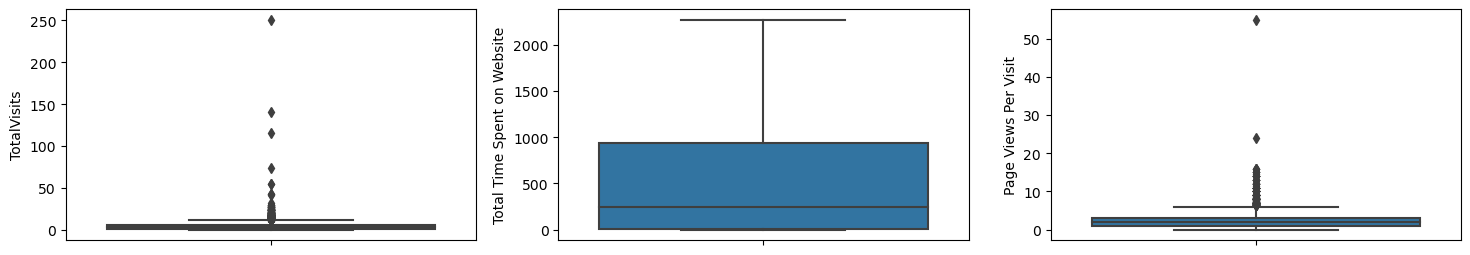

In [27]:
#Checking outliers
#Draw box plots for continuous columns
fig = plt.figure(figsize=(18,3))

i = 1
for col in continuous_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=lead_df)
    i+=1

In [28]:
#Insight: As we can see there are outliers in TotalVisits & Page Views Per Visit columns.

In [29]:
#Function for outliers treatment
def outlier_treatment(df,column):
    q1=df[column].describe()["25%"]
    q3=df[column].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])
    df[column]=np.where(df[column]<lower_bound,lower_bound,df[column])
    return df

In [30]:
#Treating outliers
for col in continuous_cols:
    lead_df=outlier_treatment(lead_df,col)

#### Fixing Invalid values & Standardising Data

In [31]:
#Changing google to Google (data standardise)
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google","Google")

In [32]:
#Grouping low frequency value levels to Others for 'Lead Source' column
lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")


In [33]:
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'Others'], dtype=object)

In [34]:
#Grouping low frequency value levels to Others for 'Last Activity' column
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [35]:
lead_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Others',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'SMS Sent'],
      dtype=object)

### Step 4: Exploratory Data Analysis (EDA)

In [36]:
#As per problem statement 'Converted' is our target variable.
# 0: Not converted into lead.
# 1: Lead has been successfully Converted.

In [37]:
#Calculating conversion rate
round(100*lead_df['Converted'].mean(),2)

38.54

In [38]:
#Insight: There are 38% leads are successfully converted.

#### Data Imbalance

In [39]:
#Checking data imbalance in target variable(Converted)
100 * lead_df['Converted'].value_counts(normalize=True)

0    61.461039
1    38.538961
Name: Converted, dtype: float64

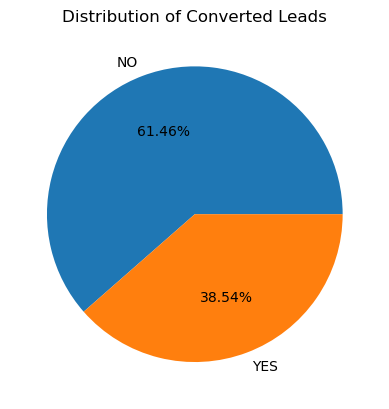

In [40]:
#piechart to check data imbalance
labels = ['NO','YES']

#Create a pie chart
plt.pie(lead_df['Converted'].value_counts(), labels=labels, autopct='%2.2f%%')

#Add a title
plt.title('Distribution of Converted Leads')

# Display the pie chart
plt.show()

In [41]:
#Insight: 38.54% of the people have converted to leads & 61.46% of the people haven't convert to leads.

#### Univariate Analysis

#### Univariate Analysis for Categorical Variables

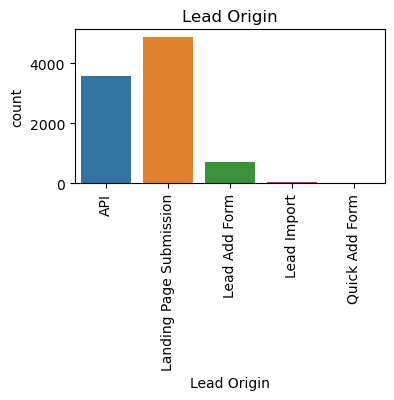

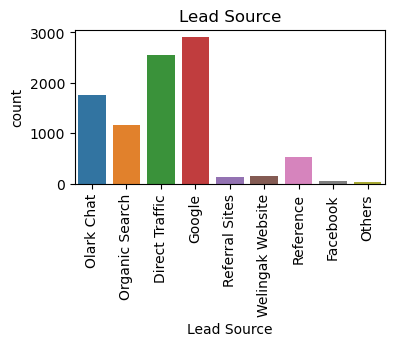

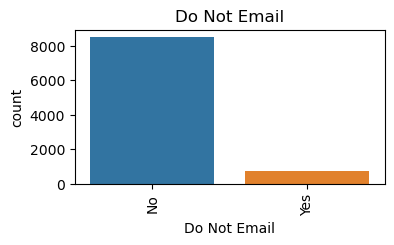

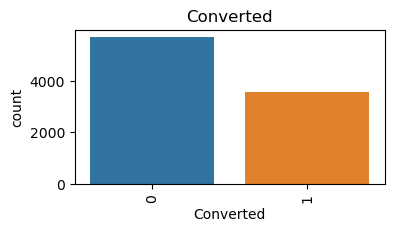

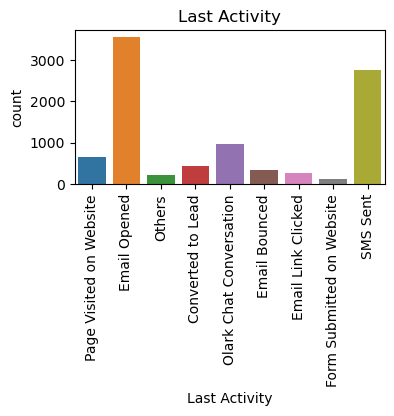

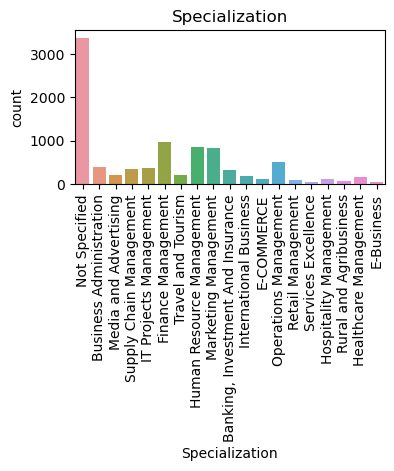

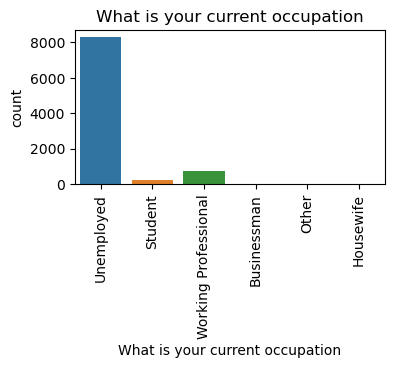

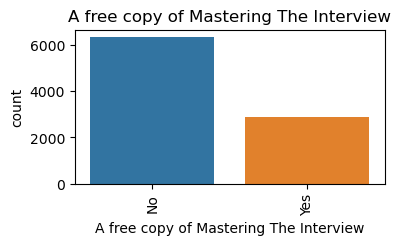

In [42]:
#Countplot for categorical columns
for i in categorical_cols:
    plt.figure(figsize=[4,2])
    plt.title(i)
    sns.countplot(x=i,data=lead_df)
    plt.xticks(rotation=90)

In [43]:
#Insights:
#Lead Origin: "Landing Page Submission" & "API" identified maximum.
#Lead Source: Maximum Lead source is from Google & Direct Traffic combined.
#Do Not Email: Maximum number of the people has opted that they don't want to be emailed about the course.
#Converted: Minimum customers are converted to Leads.
#Last Activity: Maximum of customers contribution in SMS Sent & Email Opened activities.
#Specialization: maximum customers haven't specified their specialization.
#Current_occupation: maximum customers are Unemployed.

#### Bivariate Analysis for Continuous Variables

<Figure size 1600x400 with 0 Axes>

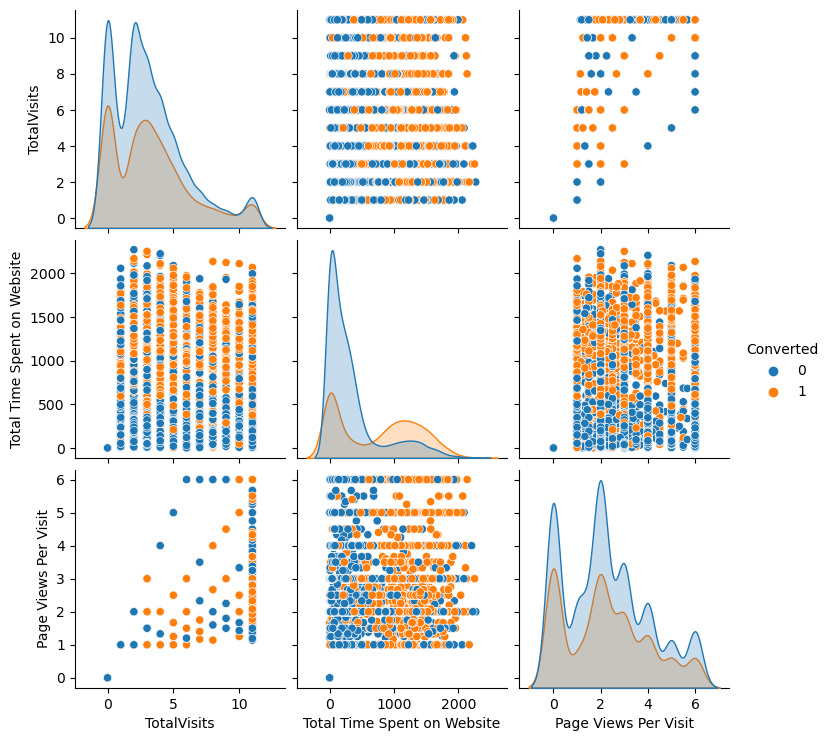

In [44]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_df,vars=continuous_cols,hue="Converted")                                  
plt.show()

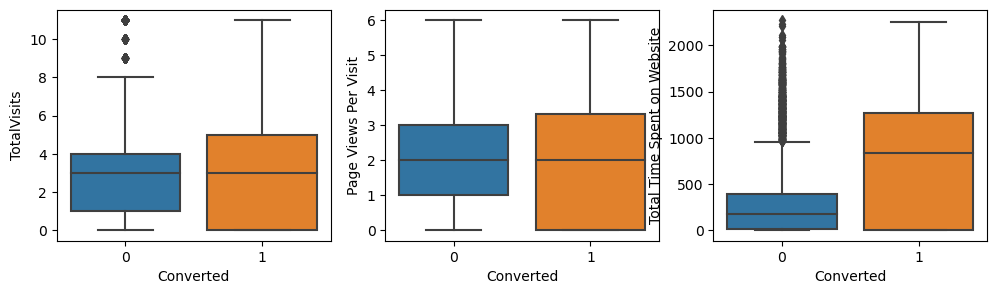

In [45]:
# Boxplot with Converted as hue
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

In [46]:
#Insight: Past Leads who spends more time on Website are successfully converted.

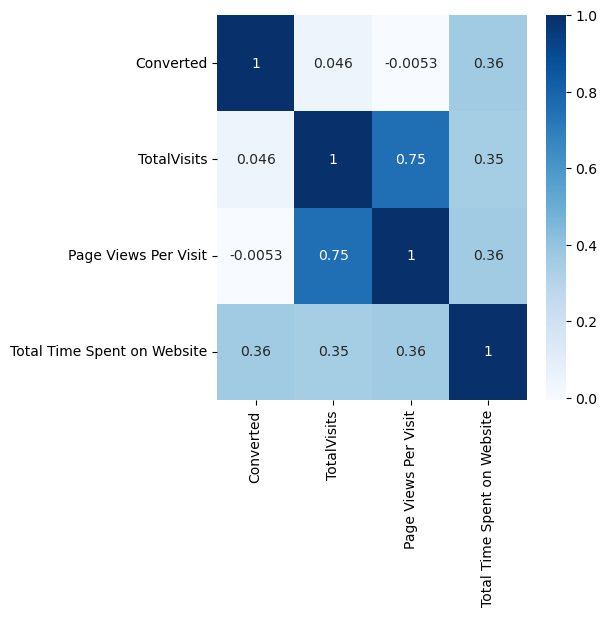

In [47]:
# Heatmap to show correlation between continuous variables
plt.figure(figsize=(5,5))
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=lead_df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

In [48]:
#Insight : 'Page Views Per Visit' & 'TotalVisits' are high correlative with each other.

#### Multivariate Analysis

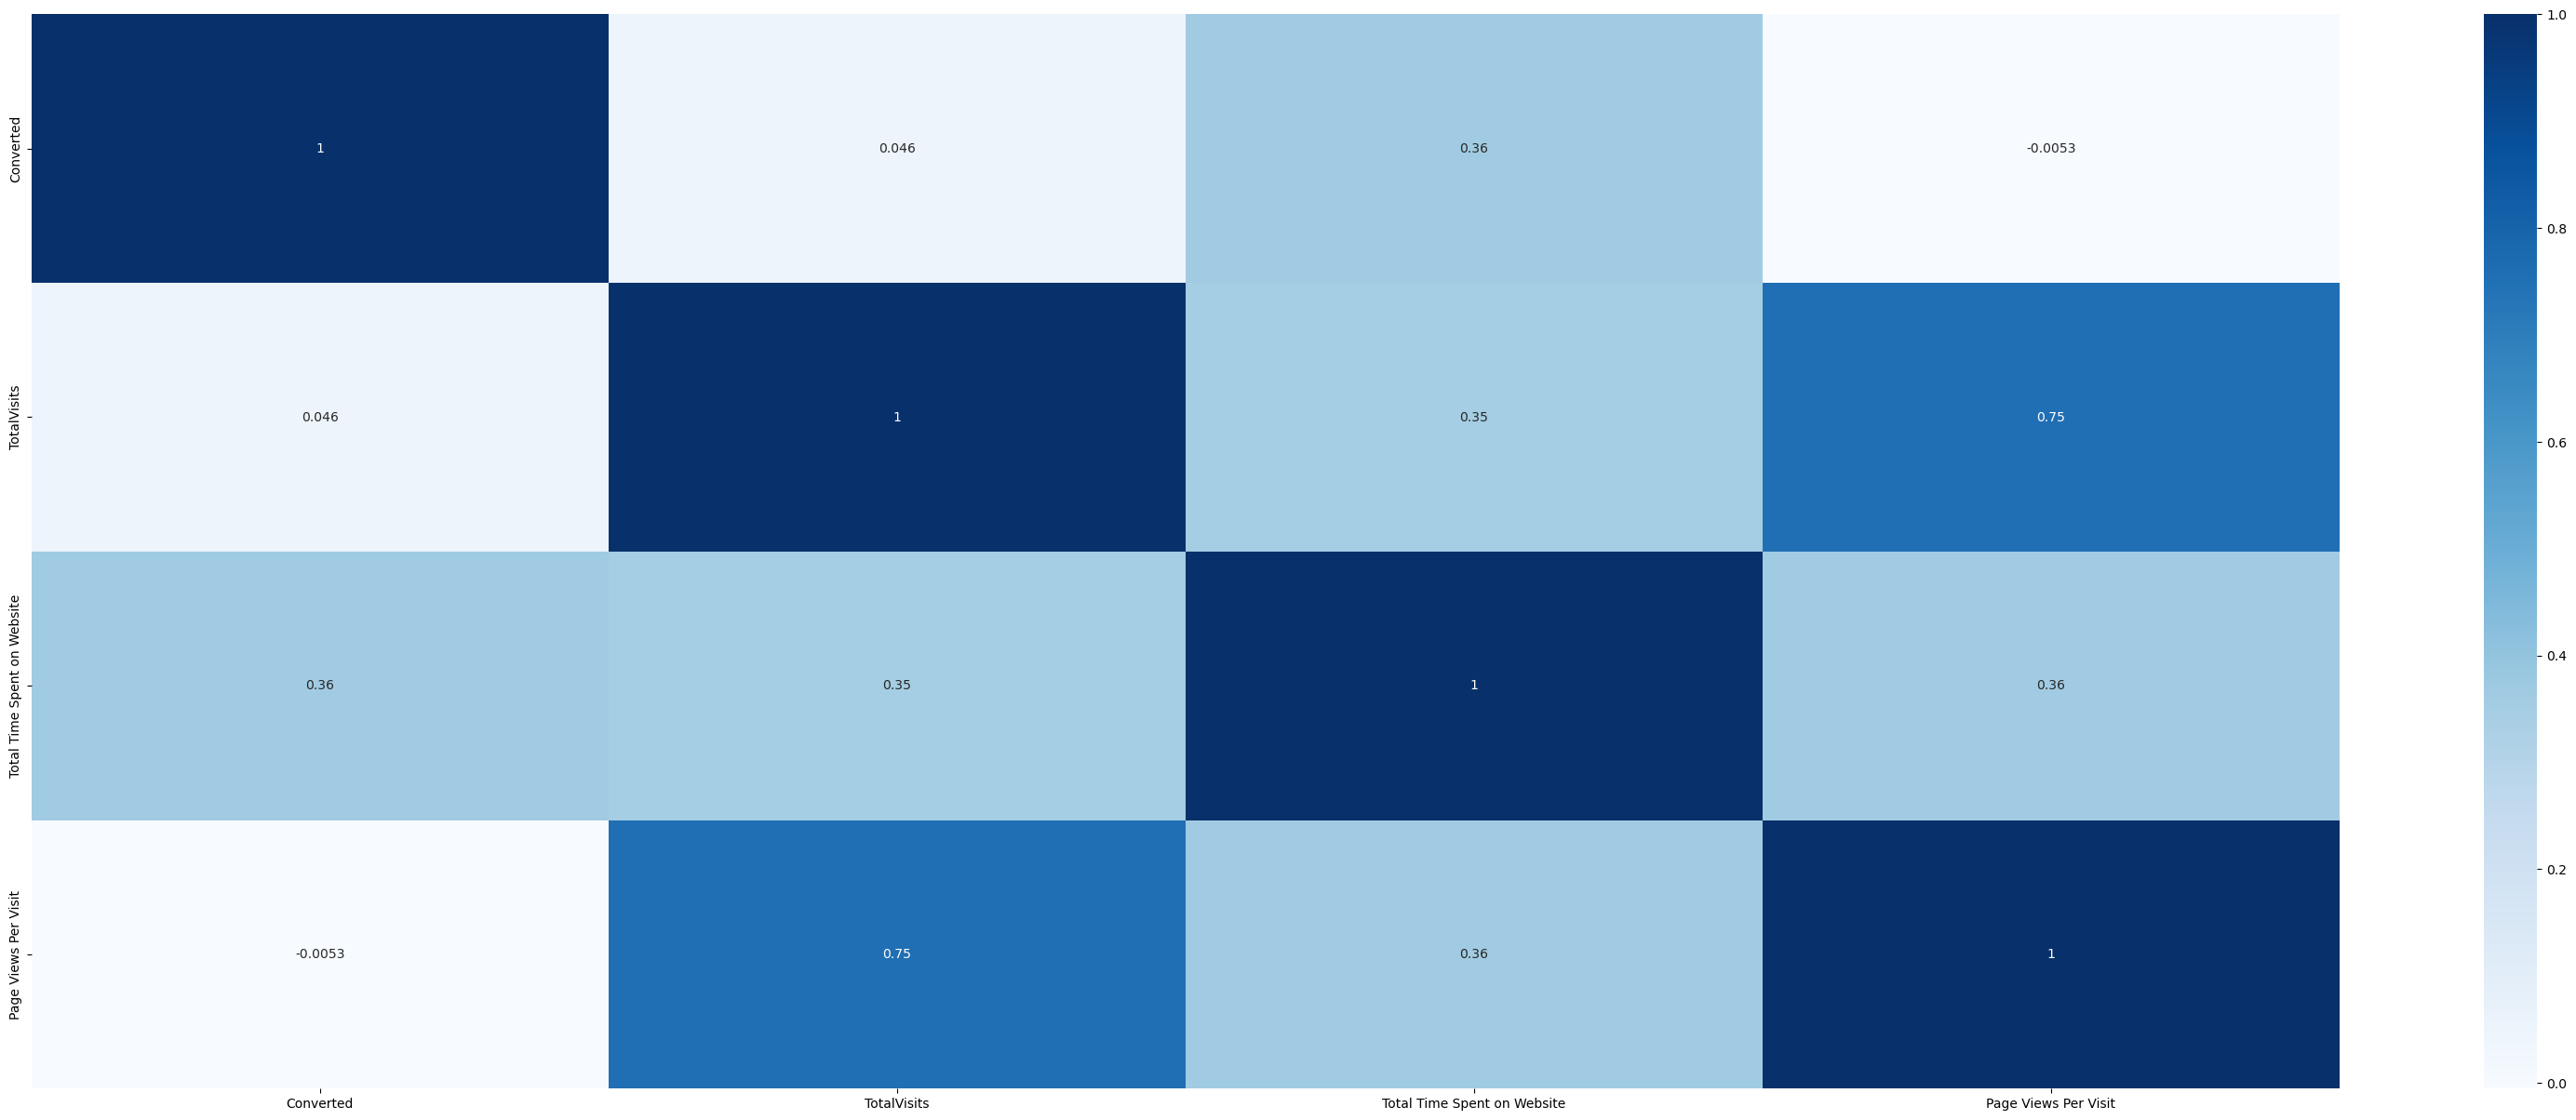

In [49]:
# Heatmap to show correlation between variables
plt.figure(figsize=(40,15))
sns.heatmap(data=lead_df.corr(),cmap="Blues",annot=True)
plt.show()

In [50]:
#Insights:
#'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
#'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation of.0.62.
#'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
#'TotalVisits' and 'Page Views Per Visit' having correlation of 0.75.
#'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

### Step 5: Data Preparation

In [51]:
#Converting binary variables (Yes/No) to 0/1

vars =  ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable
lead_df[vars] = lead_df[vars].apply(binary_map)

In [52]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Not Specified,Unemployed,0


#### Creating Dummy Variables

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy], axis=1)

In [54]:
# We have created dummies for the below variables, so we can drop them.
lead_df = lead_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],axis=1)

In [55]:
lead_df.shape

(9240, 49)

In [56]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

### Step 6: Test-Train Split

In [57]:
#Putting predictor variables to X
X = lead_df.drop('Converted', axis=1)

# Putting Target variables to y
y = lead_df["Converted"]

In [58]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
X_train.shape

(6468, 48)

In [60]:
X_test.shape

(2772, 48)

### Step 7: Feature Scaling

In [61]:
continuous_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [62]:
#Creating 'scaler' object for 'StandardScaler'
scaler = StandardScaler()

#Applying 'fit_transform' to scale the 'train' data set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,0.275215,0.005716,-0.516439,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0,0.624595,1.365219,1.553761,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

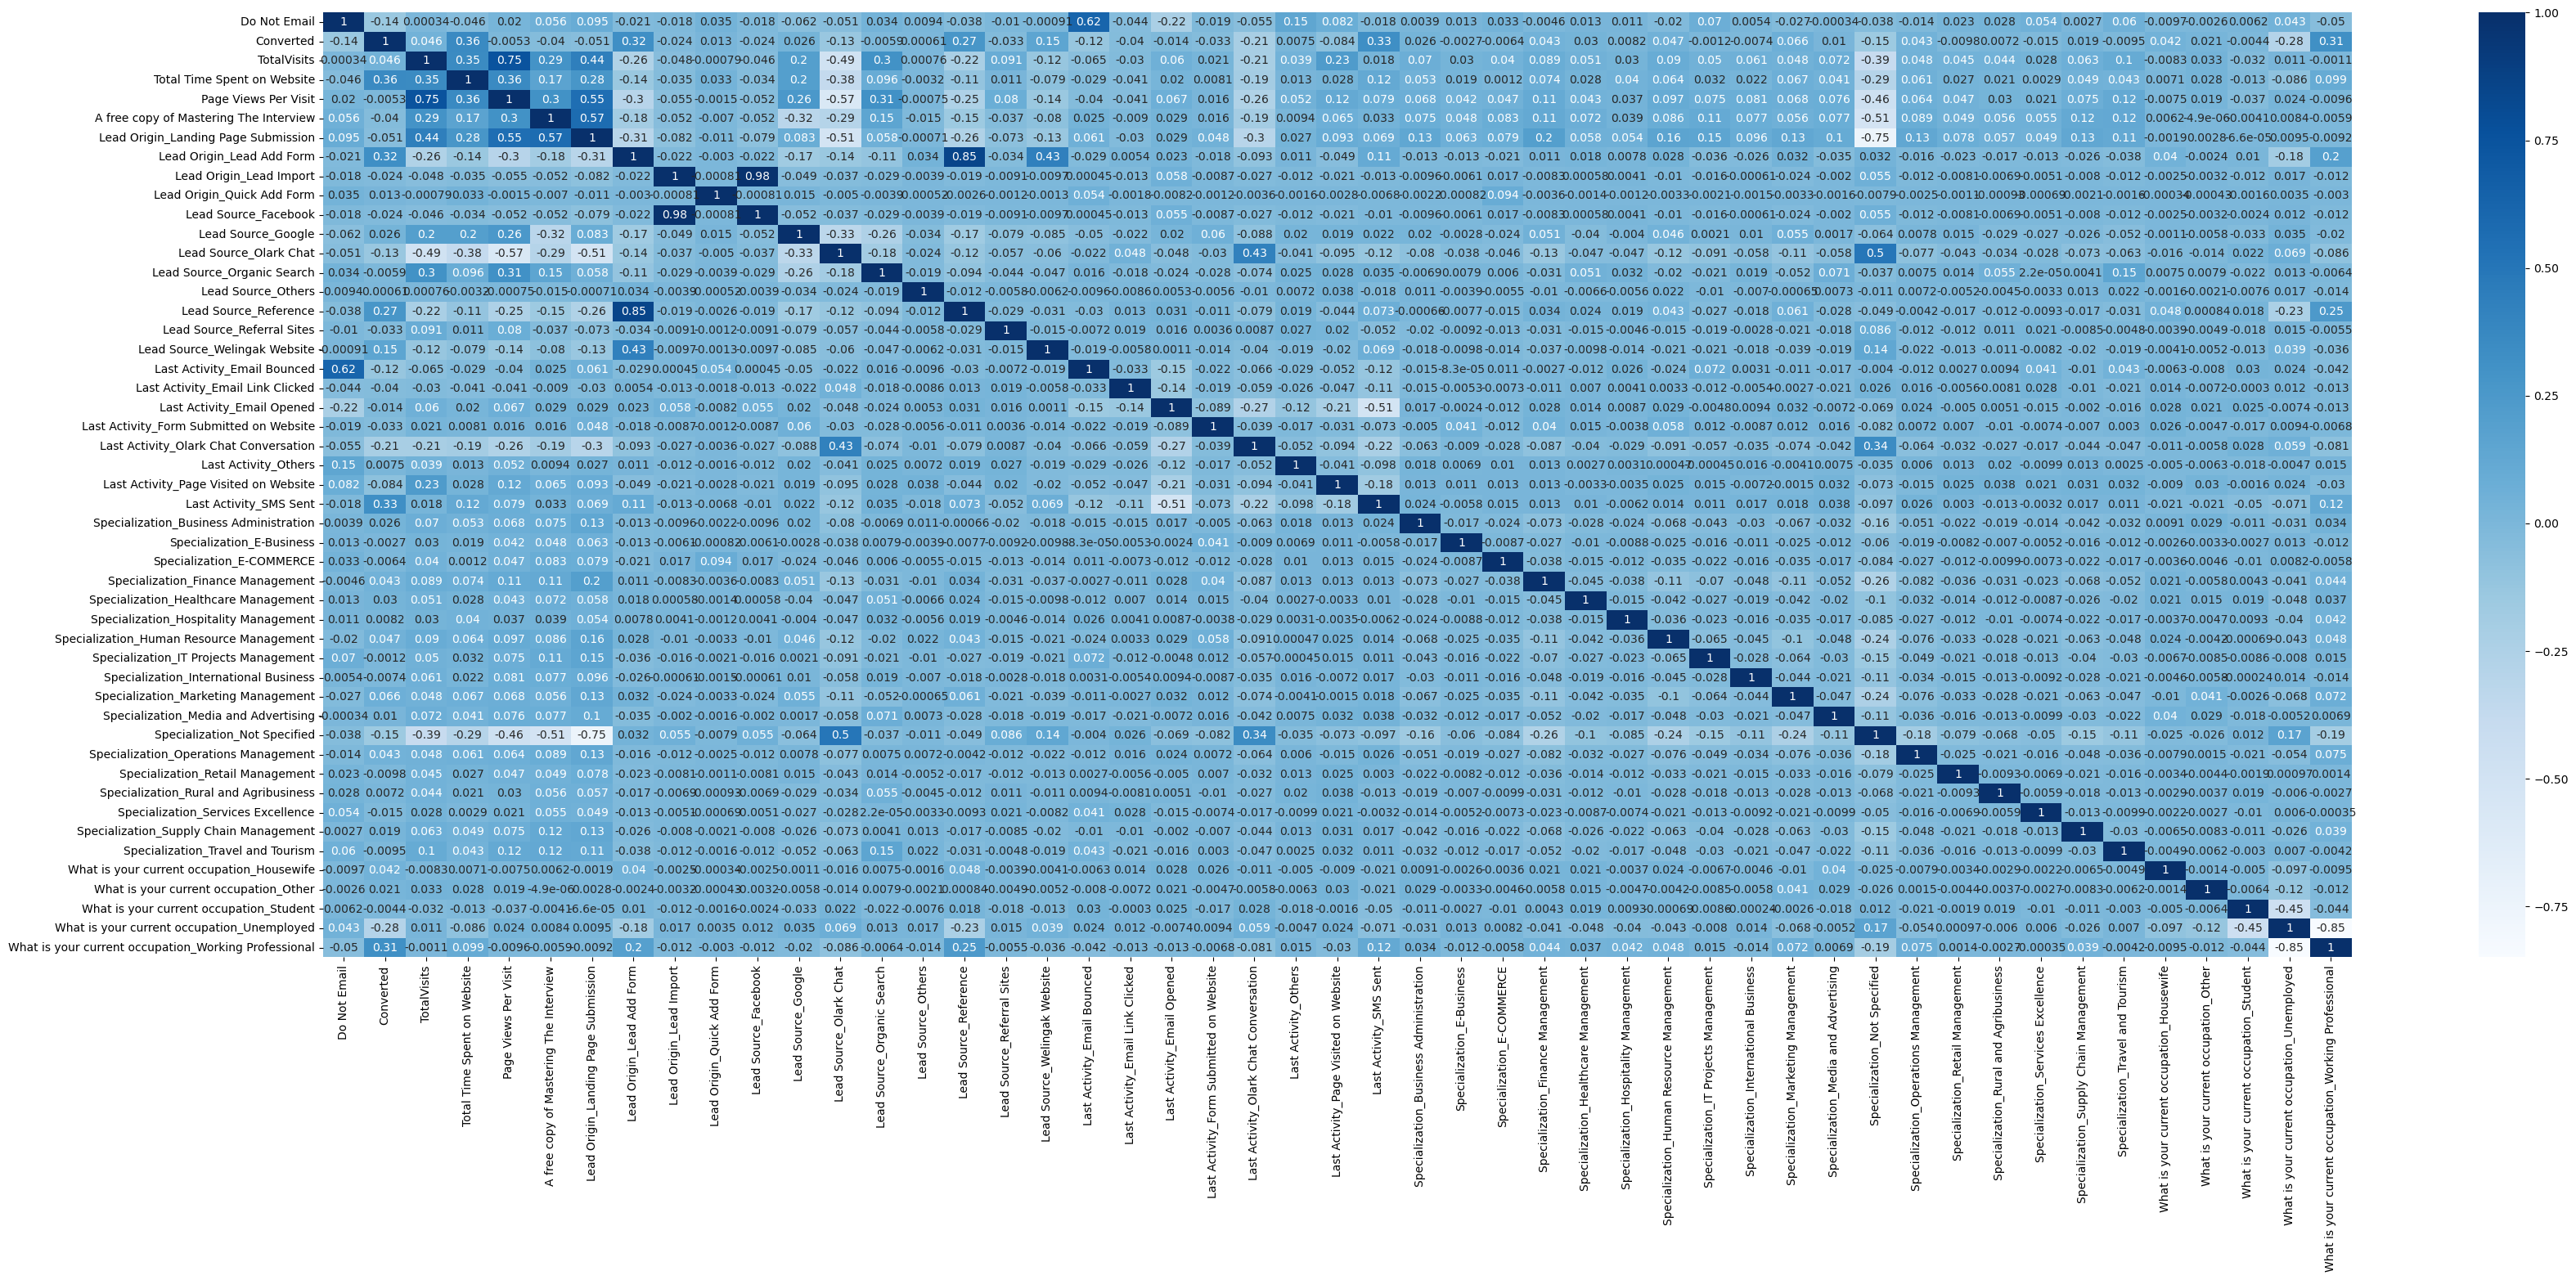

In [63]:
#Analysing correlation matrix
plt.figure(figsize = (40,15))        
sns.heatmap(lead_df.corr(),cmap="Blues",annot=True)
plt.show

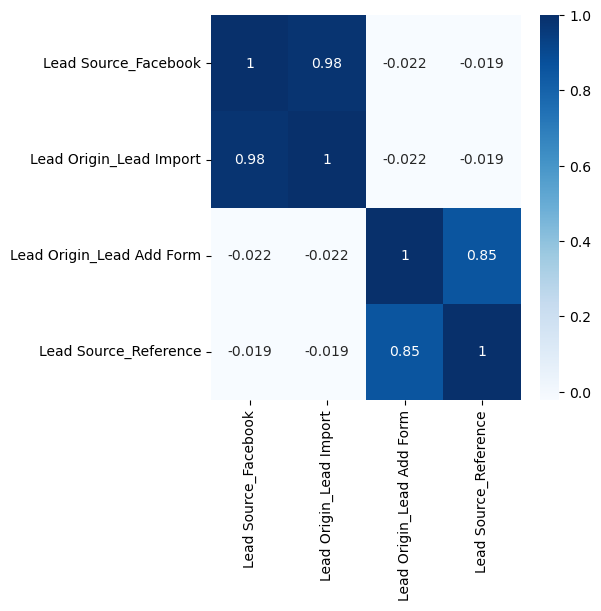

In [64]:
#Analysing variables which might be highly correlated with each other from same class from above heatmap graph
plt.figure(figsize = (5,5))        
sns.heatmap(lead_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),cmap="Blues",annot=True)
plt.show()

In [65]:
#Variables above are very highly correlated with each other(0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. 
#dropping 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' from test set
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

#dropping 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' from train set
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

### Step 8: Model Building

In [66]:
#Let's use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [67]:
#Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [68]:
#Columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [69]:
#Columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       

In [70]:
#Function to calculate VIFs and print them - Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    vif = pd.DataFrame()
    vif['Features'] = cols
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [71]:
#Building model using statsmodels

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train[rfe_col])

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

print(logm1.summary())

#Checking VIF
get_vif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Thu, 11 Apr 2024   Deviance:                       5418.7
Time:                        18:31:16   Pearson chi2:                 8.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [72]:
#Insight : Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [73]:
# Dropping the column 'What is your current occupation_Housewife'
rfe_col = rfe_col.drop('What is your current occupation_Housewife')

#### Model 2

In [74]:
# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train[rfe_col])

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

print(logm2.summary())

#Checking VIF
get_vif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.7
Date:                Thu, 11 Apr 2024   Deviance:                       5433.3
Time:                        18:31:16   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [75]:
#Insight : No variable needs to be dropped as p-values for all variables is less than 0.05 & have good VIF values less than 5.

### Step 9: Model Evaluation

In [76]:
#Getting the Predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)
y_train_pred[:10]

1871    0.470439
6795    0.074936
3516    0.249685
8105    0.781319
3934    0.213621
4844    0.988257
3297    0.109291
8071    0.997164
987     0.194157
7423    0.874441
dtype: float64

In [77]:
#Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47043941, 0.0749365 , 0.24968468, 0.78131853, 0.2136214 ,
       0.98825713, 0.10929108, 0.99716422, 0.19415693, 0.87444095])

In [78]:
#Dataframe with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.470439
1,0,0.074936
2,0,0.249685
3,0,0.781319
4,0,0.213621


In [79]:
#we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted.
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.470439,0
1,0,0.074936,0
2,0,0.249685,0
3,0,0.781319,1
4,0,0.213621,0


#### Confusion Matrix

In [80]:
#Confusion matrix (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3586  416]
 [ 839 1627]]


#### Accuracy

In [81]:
#Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.8059678416821274


In [82]:
#Evaluating other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
#Calculating the Sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.6597729115977291

In [84]:
#Calculating the Specificity
Specificity = TN/(TN+FP)
Specificity

0.8960519740129935

#### Plotting the ROC (Receiver Operating Characteristic) Curve

In [85]:
#ROC function
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1],[0, 1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [86]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final['Converted'],y_train_pred_final['Conversion_Prob'],drop_intermediate=False)

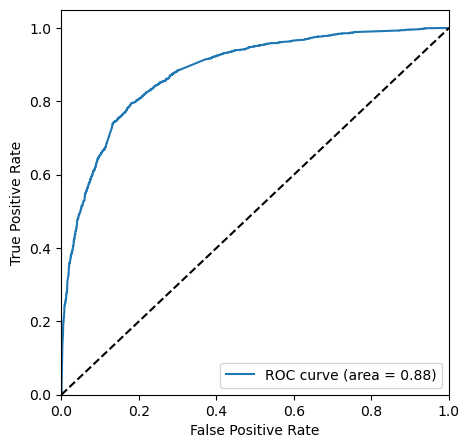

In [87]:
#Calling the ROC function
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

In [88]:
#Insight : Area under ROC curve is 0.88 out of 1 which indicates a good predictive model.

#### Finding Optimal Cutoff Point/ Probability

In [89]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.470439,0,1,1,1,1,1,0,0,0,0,0
1,0,0.074936,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249685,0,1,1,1,0,0,0,0,0,0,0
3,0,0.781319,1,1,1,1,1,1,1,1,1,0,0
4,0,0.213621,0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.588590     0.974047     0.351074
0.2          0.2  0.729128     0.918086     0.612694
0.3          0.3  0.790971     0.837794     0.762119
0.4          0.4  0.811688     0.768856     0.838081
0.5          0.5  0.805968     0.659773     0.896052
0.6          0.6  0.797310     0.594485     0.922289
0.7          0.7  0.782777     0.513788     0.948526
0.8          0.8  0.754174     0.405109     0.969265
0.9          0.9  0.707638     0.248581     0.990505


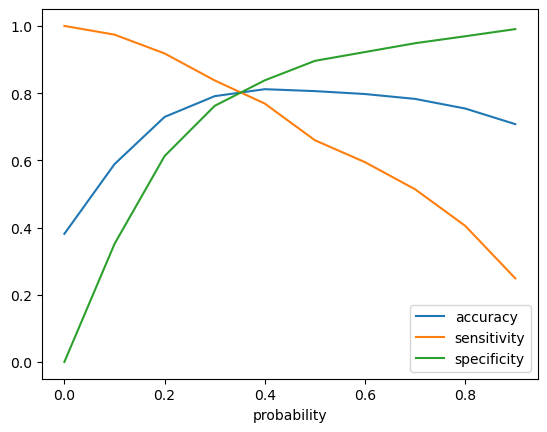

In [91]:
# Plotting it
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [92]:
#From the graph it is visible that the optimal cut off is at 0.35.
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x:1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.470439,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.074936,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.249685,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.781319,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.213621,0,1,1,1,0,0,0,0,0,0,0,0


#### Calculating all metrics using confusion matrix for Train

In [93]:
#Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8045763760049475

In [94]:
#Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion2

array([[3223,  779],
       [ 485, 1981]])

In [95]:
#Substituting the value of true positive
TP = confusion2[1,1]
#Substituting the value of true negatives
TN = confusion2[0,0]
#Substituting the value of false positives
FP = confusion2[0,1] 
#Substituting the value of false negatives
FN = confusion2[1,0]

In [96]:
#Calculating the sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.8033252230332523

In [97]:
#Calculating the specificity
Specificity = TN/(TN+FP)
Specificity

0.8053473263368316

In [98]:
#With the current cut off as 0.35 we have accuracy,sensitivity and specificity of around 80%.

#### Precision and recall tradeoff

In [99]:
#Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['Predicted']
p,r,thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

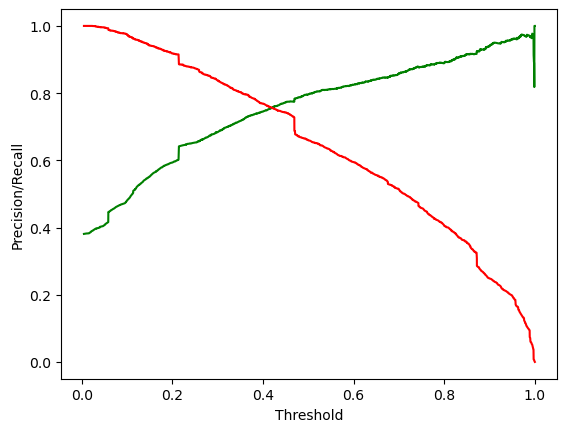

In [100]:
#plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add axis labels
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [101]:
#Insight : probability threshold is 0.41 aprrox from above curve.

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.470439,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.074936,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.249685,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.781319,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.213621,0,1,1,1,0,0,0,0,0,0,0,0


In [103]:
#Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8127705627705628

In [104]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_predicted'])
confusion2

array([[3377,  625],
       [ 586, 1880]])

In [105]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [106]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7504990019960079

In [107]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7623682076236821

In [108]:
#Insight : With the current cut off as 0.41 we have Precision around 75% and Recall around 76%.
#As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate,Sensitivity,Recall have dropped to around 75%, 
#but we need it close to 80% as the Business Objective.
#80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.35. 
#So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

#### Adding Lead Score Feature to Training dataframe

In [109]:
#Add Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.470439,0,1,1,1,1,1,0,0,0,0,0,1,47
1,0,0.074936,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.249685,0,1,1,1,0,0,0,0,0,0,0,0,25
3,0,0.781319,1,1,1,1,1,1,1,1,1,0,0,1,78
4,0,0.213621,0,1,1,1,0,0,0,0,0,0,0,0,21


In [110]:
#A higher score would mean that the lead is hot, i.e. is most likely to convert Whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 10: Predictions on Test set

In [111]:
continuous_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [112]:
#Scaling numeric values
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [113]:
#Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[rfe_col])
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Not Specified,What is your current occupation_Working Professional
4269,1.0,0,0.964504,0,0,0,0,0,0,0,0,1,0,1,0
2376,1.0,0,-0.885371,0,0,0,1,0,0,0,0,1,0,1,0
7766,1.0,0,-0.777416,0,0,0,0,0,0,0,1,0,0,0,1
9199,1.0,0,-0.885371,0,1,0,0,0,0,1,0,0,0,1,0
4359,1.0,0,-0.885371,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,-0.354744,1,0,0,0,0,0,0,0,0,0,0,0
2152,1.0,0,-0.885371,0,0,0,0,0,0,0,0,1,0,1,0
7101,1.0,0,-0.885371,0,1,0,0,0,1,0,0,0,0,1,0
5331,1.0,1,2.056864,1,0,0,0,0,0,0,0,0,0,0,0


In [114]:
X_test_sm.shape

(2772, 15)

In [115]:
#Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm2.predict(X_test_sm)

In [116]:
#Coverting y_test_pred to dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
4269,0.707650
2376,0.871173
7766,0.913707
9199,0.058507
4359,0.871801


In [117]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [118]:
#Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [119]:
#Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_test_pred_final.head()

,Converted,0
0,1,0.707650
1,1,0.871173
2,1,0.913707
3,0,0.058507
4,1,0.871801


In [120]:
#Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,1,0.707650
1,1,0.871173
2,1,0.913707
3,0,0.058507
4,1,0.871801


In [121]:
#Making prediction using cut off 0.35
y_test_pred_final['final_predicted'] = y_test_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.707650,1
1,1,0.871173,1
2,1,0.913707,1
3,0,0.058507,0
4,1,0.871801,1


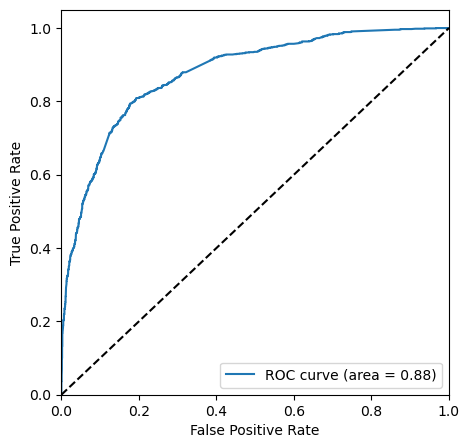

In [122]:
# Drawing ROC curve for Test Set
fpr,tpr,thresholds=metrics.roc_curve(y_test_pred_final['Converted'],y_test_pred_final['Conversion_Prob'],drop_intermediate = False )
draw_roc(y_test_pred_final['Converted'],y_test_pred_final['Conversion_Prob'])

In [123]:
#Insight : Area under ROC curve is 0.88 out of 1 which indicates a good predictive model.

In [124]:
#Check the overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])

0.8077200577200577

In [125]:
#Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])
confusion2

array([[1364,  313],
       [ 220,  875]])

In [126]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [127]:
# Calculating the sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.7990867579908676

In [128]:
# Calculating the specificity
Specificity = TN/(TN+FP)
Specificity

0.8133571854502087

In [129]:
#Insight: The evaluation matrics are pretty close to each other so it indicates that the model is performing well in both test and train dataset.

In [130]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            5.486350
Lead Source_Reference                                   2.962948
What is your current occupation_Working Professional    2.638583
Last Activity_SMS Sent                                  1.931975
Last Activity_Others                                    1.406916
Lead Source_Others                                      1.078488
Total Time Spent on Website                             1.046326
Lead Source_Olark Chat                                  0.927594
Last Activity_Email Opened                              0.752723
Last Activity_Olark Chat Conversation                  -0.722372
const                                                  -0.872311
Specialization_Hospitality Management                  -1.067609
Do Not Email                                           -1.117864
Specialization_Not Specified                           -1.184853
Lead Origin_Landing Page Submission                    -1.214762
dtype: float64

In [131]:
#Insight : A high positive coefficient indicates that a variable has a high probability of leads converting to take up X-Education's course.

#### Adding Lead Score Feature to Test dataframe

In [132]:
#Add Lead Score 
y_test_pred_final['Lead_Score'] = y_test_pred_final['Conversion_Prob'].map(lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.707650,1,71
1,1,0.871173,1,87
2,1,0.913707,1,91
3,0,0.058507,0,6
4,1,0.871801,1,87


* The customers with a higher lead score have a higher conversion chance.
* The customers with a lower lead score have a lower conversion chance.

### Conclusion

* The final Logistic Regression Model has 14 features:
1.  Lead Source_Welingak Website                            5.486350<br>
2.  Lead Source_Reference                                   2.962948<br>
3.  What is your current occupation_Working Professional    2.638583<br>
4.  Last Activity_SMS Sent                                  1.931975<br>
5.  Last Activity_Others                                    1.406916<br>
6.  Lead Source_Others                                      1.078488<br>
7.  Total Time Spent on Website                             1.046326<br>
8.  Lead Source_Olark Chat                                  0.927594<br>
9.  Last Activity_Email Opened                              0.752723<br>
10. Last Activity_Olark Chat Conversation                  -0.722372<br>
11. Specialization_Hospitality Management                  -1.067609<br>
12. Do Not Email                                           -1.117864<br>
13. Specialization_Not Specified                           -1.184853<br>
14. Lead Origin_Landing Page Submission   -1.214762

* To increase Lead Conversion Rates:<br>
-> Focus on features with positive coefficients.<br>
-> More spend can be done on Welingak Website in terms of advertising, etc.<br>
-> Engage working professionals with messaging.<br>
-> Incentives or discounts for providing reference that convert to lead, encourage providing more references.<br>
-> Working professionals to be aggressively targeted as they have high conversion rate.<br>
-> Develop strategies to attract high-quality leads from top-performing lead sources.

* To identify areas of improvement:<br>
-> Analyze negative coefficients.<br>
-> Review landing page submission process for areas of improvement.

* The Optimal cutoff probability point is 0.35.

* Train Data Set:
1. Accuracy: 80.45%<br>
2. Sensitivity: 80.33%<br>
3. Specificity: 80.53%

* Test Data Set:
1. Accuracy: 80.77%<br>
2. Sensitivity: 79.90% ≈ 80%<br>
3. Specificity: 81.33%